# Machine Learning Insight Engine for Predicting Healthcare Costs from Lifestyle and Demographic Indicators

In [1]:
import numpy as np 
import pandas as pd 
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

#Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
#pip install openpyxl

In [2]:
df = pd.read_csv(r"insurance.csv")
df

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,no,northwest,10600.54830
1334,18,female,31.920,no,northeast,2205.98080
1335,18,female,36.850,no,southeast,1629.83350
1336,21,female,25.800,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   bmi      1338 non-null   float64
 3   smoker   1338 non-null   object 
 4   region   1338 non-null   object 
 5   charges  1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


In [4]:
df.isnull().sum()

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates()
df

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,no,northwest,10600.54830
1334,18,female,31.920,no,northeast,2205.98080
1335,18,female,36.850,no,southeast,1629.83350
1336,21,female,25.800,no,southwest,2007.94500


<AxesSubplot:>

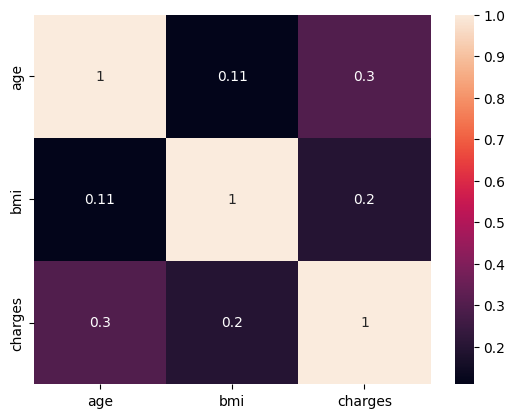

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df

,age,sex,bmi,smoker,region,charges
0,19,0,27.900,1,3,16884.92400
1,18,1,33.770,0,2,1725.55230
2,28,1,33.000,0,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,0,1,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,2,1629.83350
1336,21,0,25.800,0,3,2007.94500


In [9]:
x = df.drop(['charges'],axis=1)
x


,age,sex,bmi,smoker,region
0,19,0,27.900,1,3
1,18,1,33.770,0,2
2,28,1,33.000,0,2
3,33,1,22.705,0,1
4,32,1,28.880,0,1
...,...,...,...,...,...
1333,50,1,30.970,0,1
1334,18,0,31.920,0,0
1335,18,0,36.850,0,2
1336,21,0,25.800,0,3


In [10]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [12]:
mae = []
mse = []
rmse = []
r2 = []

def performance_metrics(algorithm, predict, testY):
    predict = predict.astype('float')
    testY = testY.astype('float')
    
    # Calculate regression metrics
    mean_abs_error = mean_absolute_error(testY, predict)
    mean_sqr_error = mean_squared_error(testY, predict)
    root_mean_sqr_error = np.sqrt(mean_sqr_error)
    r_squared = r2_score(testY, predict)
    # Append metrics to the lists
    mae.append(mean_abs_error)
    mse.append(mean_sqr_error)
    rmse.append(root_mean_sqr_error)
    r2.append(r_squared)
    
    print(algorithm + ' Mean Absolute Error : ' + str(mean_abs_error))
    print(algorithm + ' Mean Squared Error  : ' + str(mean_sqr_error))
    print(algorithm + ' Root Mean Squared Error : ' + str(root_mean_sqr_error))
    print(algorithm + ' R² Score : ' + str(r_squared))
    

    # Plotting best-fit line
    plt.scatter(testY, predict)
    plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], '--r', lw=2)  # best-fit line
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(algorithm + ' Predictions vs True Values')
    plt.show()

KNN Regressor Mean Absolute Error : 7767.282002033582
KNN Regressor Mean Squared Error  : 125617287.0175177
KNN Regressor Root Mean Squared Error : 11207.911804503
KNN Regressor R² Score : 0.1646290774839928


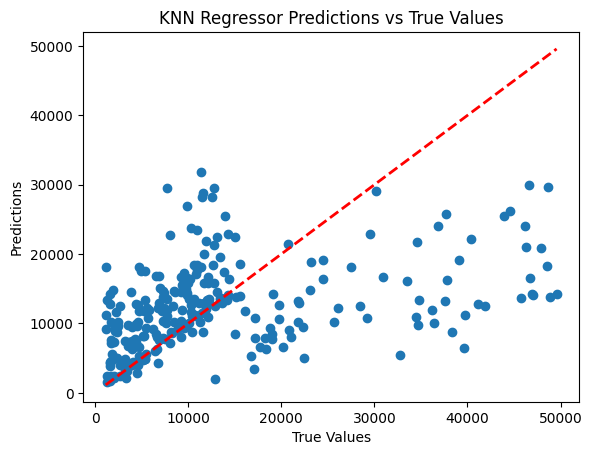

In [13]:
import os
import joblib
from sklearn.neighbors import KNeighborsRegressor

model_filename = 'knn_regressor.pkl'

if os.path.exists(model_filename):
    # Load the saved model
    knn_regressor = joblib.load(model_filename)
    predictions = knn_regressor.predict(x_test)
    performance_metrics("KNN Regressor", predictions, y_test)
else:
    # Initialize and train the KNN Regressor model
    knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can change the number of neighbors
    knn_regressor.fit(x_train, y_train)
    
    # Make predictions on test data
    predictions = knn_regressor.predict(x_test)
    
    # Save the trained model
    joblib.dump(knn_regressor, model_filename)
    print("KNN Regressor model trained and weights saved.")
    
    # Evaluate the model
    performance_metrics("KNN Regressor", predictions, y_test)


Gradient Boosting Regression Mean Absolute Error : 2190.2198744093234
Gradient Boosting Regression Mean Squared Error  : 14605508.81712038
Gradient Boosting Regression Root Mean Squared Error : 3821.7154285896772
Gradient Boosting Regression R² Score : 0.9028715102510368


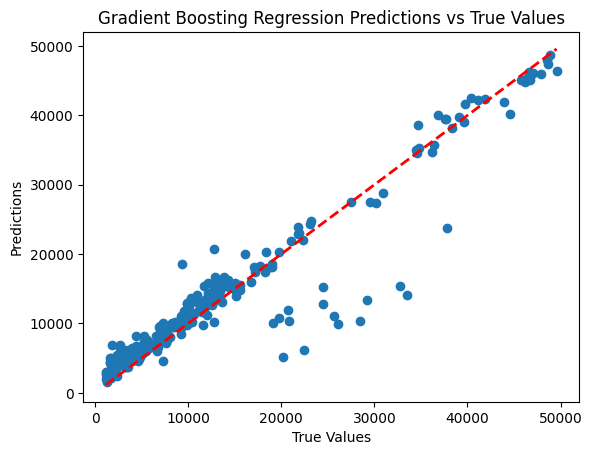

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import os

model = 'model/gradient_boosting_regressor.pkl'

if os.path.exists(model):
    # Load the model from the pkl file
    gradient_boosting_regressor = joblib.load(model)
    predict = gradient_boosting_regressor.predict(x_test)
    performance_metrics("Gradient Boosting Regression", predict, y_test)
else:
    gradient_boosting_regressor = GradientBoostingRegressor()

    # Train the regressor on the training data
    gradient_boosting_regressor.fit(x_train, y_train)
    # Make predictions on the test data
    predict = gradient_boosting_regressor.predict(x_test)
    joblib.dump(gradient_boosting_regressor, model)
    print("Gradient Boosting Regressor trained and model weights saved.")
    performance_metrics("Gradient Boosting Regression", predict, y_test)


In [15]:
test1 = pd.read_csv('testdata.csv')
test1

,Unnamed: 0,age,sex,bmi,smoker,region,charges
0,1033,18,1,21.565,1,0,13747.87235
1,56,58,0,31.825,0,0,13607.36875
2,120,44,1,37.100,0,3,7740.33700
3,476,24,1,28.500,1,0,35147.52848
4,328,64,0,33.800,1,3,47928.03000
5,70,27,0,24.750,1,2,16577.77950
6,884,25,1,26.695,0,1,4877.98105
7,23,34,0,31.920,1,0,37701.87680
8,1007,47,1,28.215,1,1,24915.22085
9,1019,21,0,32.680,0,1,26018.95052


In [16]:
test1 = test1.drop(['Unnamed: 0', 'charges'],axis=1)
test1

,age,sex,bmi,smoker,region
0,18,1,21.565,1,0
1,58,0,31.825,0,0
2,44,1,37.100,0,3
3,24,1,28.500,1,0
4,64,0,33.800,1,3
5,27,0,24.750,1,2
6,25,1,26.695,0,1
7,34,0,31.920,1,0
8,47,1,28.215,1,1
9,21,0,32.680,0,1


In [17]:
pred = gradient_boosting_regressor.predict(test1)
pred

array([14396.59512838, 13102.80504978,  8574.36892866, 20889.03733766,
       45920.80545103, 18265.40259545,  5426.27621886, 39085.60964639,
       24747.12063616,  4959.48670643, 14096.670751  , 21770.99001912,
       13336.45598965,  2477.42250215, 10502.32270428,  6994.07798193,
        8614.26046853,  7503.37930274,  7328.96158264,  8151.03881957])

In [18]:
test1['charges']=pred
test1

,age,sex,bmi,smoker,region,charges
0,18,1,21.565,1,0,14396.595128
1,58,0,31.825,0,0,13102.805050
2,44,1,37.100,0,3,8574.368929
3,24,1,28.500,1,0,20889.037338
4,64,0,33.800,1,3,45920.805451
5,27,0,24.750,1,2,18265.402595
6,25,1,26.695,0,1,5426.276219
7,34,0,31.920,1,0,39085.609646
8,47,1,28.215,1,1,24747.120636
9,21,0,32.680,0,1,4959.486706
